# Stock Data Analysis 
## Vivek Mondal

## Importing all necessery libraries.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_percentage_error

2023-07-01 15:44:59.855283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Reading the data from the .csv file

In [2]:
data=pd.read_csv("stock_data.csv",header=0,index_col="Date")
data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  
Date                  
2018-02-05  11896100  
2018-02-06  12595800  
2018-02-07   8981500  
2018-02-08   9306700  
2018-02-09  16906900

We can see that the Data Set contains the detail of a Stock by date. We can see that the opening price, High Price, Low price, and Closing price are Present in the data. Also, the Volume of the stock is present in the dataset.

In [3]:
data.shape

(1009, 6)

The Dataset has 1009 records and 9 columns

### Describing the Dataset

In [4]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07

We can see that the starting stock value was 233.92 and from that, within 2 years and 8 months, it became 692.25, so we can clearly see that this stock gives a good return within 3 years. And in these years the avg of the stock is also 419 which is also a good thing. 

### Rounded the Values of the Price to three Decimals place

In [5]:
data[["Open","High","Low","Close","Adj Close"]]=data[["Open","High","Low","Close","Adj Close"]].round(decimals=3)

In [6]:
data.head()

Open    High     Low   Close  Adj Close    Volume
Date                                                           
2018-02-05  262.00  267.90  250.03  254.26     254.26  11896100
2018-02-06  247.70  266.70  245.00  265.72     265.72  12595800
2018-02-07  266.58  272.45  264.33  264.56     264.56   8981500
2018-02-08  267.08  267.62  250.00  250.10     250.10   9306700
2018-02-09  253.85  255.80  236.11  249.47     249.47  16906900

### Adding a New Column named Profit/Loss on basis of Dalily Open and Closing Value

In [7]:
profit_loss=data["Open"]-data["Close"]
data.insert(loc=6,column="Profit_Loss_amount",value=profit_loss)
data

Open    High     Low   Close  Adj Close    Volume  \
Date                                                              
2018-02-05  262.00  267.90  250.03  254.26     254.26  11896100   
2018-02-06  247.70  266.70  245.00  265.72     265.72  12595800   
2018-02-07  266.58  272.45  264.33  264.56     264.56   8981500   
2018-02-08  267.08  267.62  250.00  250.10     250.10   9306700   
2018-02-09  253.85  255.80  236.11  249.47     249.47  16906900   
...            ...     ...     ...     ...        ...       ...   
2022-01-31  401.97  427.70  398.20  427.14     427.14  20047500   
2022-02-01  432.96  458.48  425.54  457.13     457.13  22542300   
2022-02-02  448.25  451.98  426.48  429.48     429.48  14346000   
2022-02-03  421.44  429.26  404.28  405.60     405.60   9905200   
2022-02-04  407.31  412.77  396.64  410.17     410.17   7782400   

            Profit_Loss_amount  
Date                            
2018-02-05                7.74  
2018-02-06              -18.02  
2018-02-07                2.02  
2018-02-08               16.98  
2018-02-09                4.38  
...                        ...  
2022-01-31              -25.17  
2022-02-01              -24.17  
2022-02-02               18.77  
2022-02-03               15.84  
2022-02-04               -2.86  

[1009 rows x 7 columns]

In [8]:
data["Profit/Loss"]=data.apply(lambda x: "Profit" if (x["Close"]-x["Open"])>0 else "Loss",axis=1)
data

Open    High     Low   Close  Adj Close    Volume  \
Date                                                              
2018-02-05  262.00  267.90  250.03  254.26     254.26  11896100   
2018-02-06  247.70  266.70  245.00  265.72     265.72  12595800   
2018-02-07  266.58  272.45  264.33  264.56     264.56   8981500   
2018-02-08  267.08  267.62  250.00  250.10     250.10   9306700   
2018-02-09  253.85  255.80  236.11  249.47     249.47  16906900   
...            ...     ...     ...     ...        ...       ...   
2022-01-31  401.97  427.70  398.20  427.14     427.14  20047500   
2022-02-01  432.96  458.48  425.54  457.13     457.13  22542300   
2022-02-02  448.25  451.98  426.48  429.48     429.48  14346000   
2022-02-03  421.44  429.26  404.28  405.60     405.60   9905200   
2022-02-04  407.31  412.77  396.64  410.17     410.17   7782400   

            Profit_Loss_amount Profit/Loss  
Date                                        
2018-02-05                7.74        Loss  
2018-02-06              -18.02      Profit  
2018-02-07                2.02        Loss  
2018-02-08               16.98        Loss  
2018-02-09                4.38        Loss  
...                        ...         ...  
2022-01-31              -25.17      Profit  
2022-02-01              -24.17      Profit  
2022-02-02               18.77        Loss  
2022-02-03               15.84        Loss  
2022-02-04               -2.86      Profit  

[1009 rows x 8 columns]

In [9]:
data["Profit/Loss"].value_counts()

Loss      507
Profit    502
Name: Profit/Loss, dtype: int64

### Null values Checking. 

In [10]:
data.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
Profit_Loss_amount    0
Profit/Loss           0
dtype: int64

We Can see that there is no Null Value in the Dataset

### Line Chart between the High Price and The Low Price of the Stock.

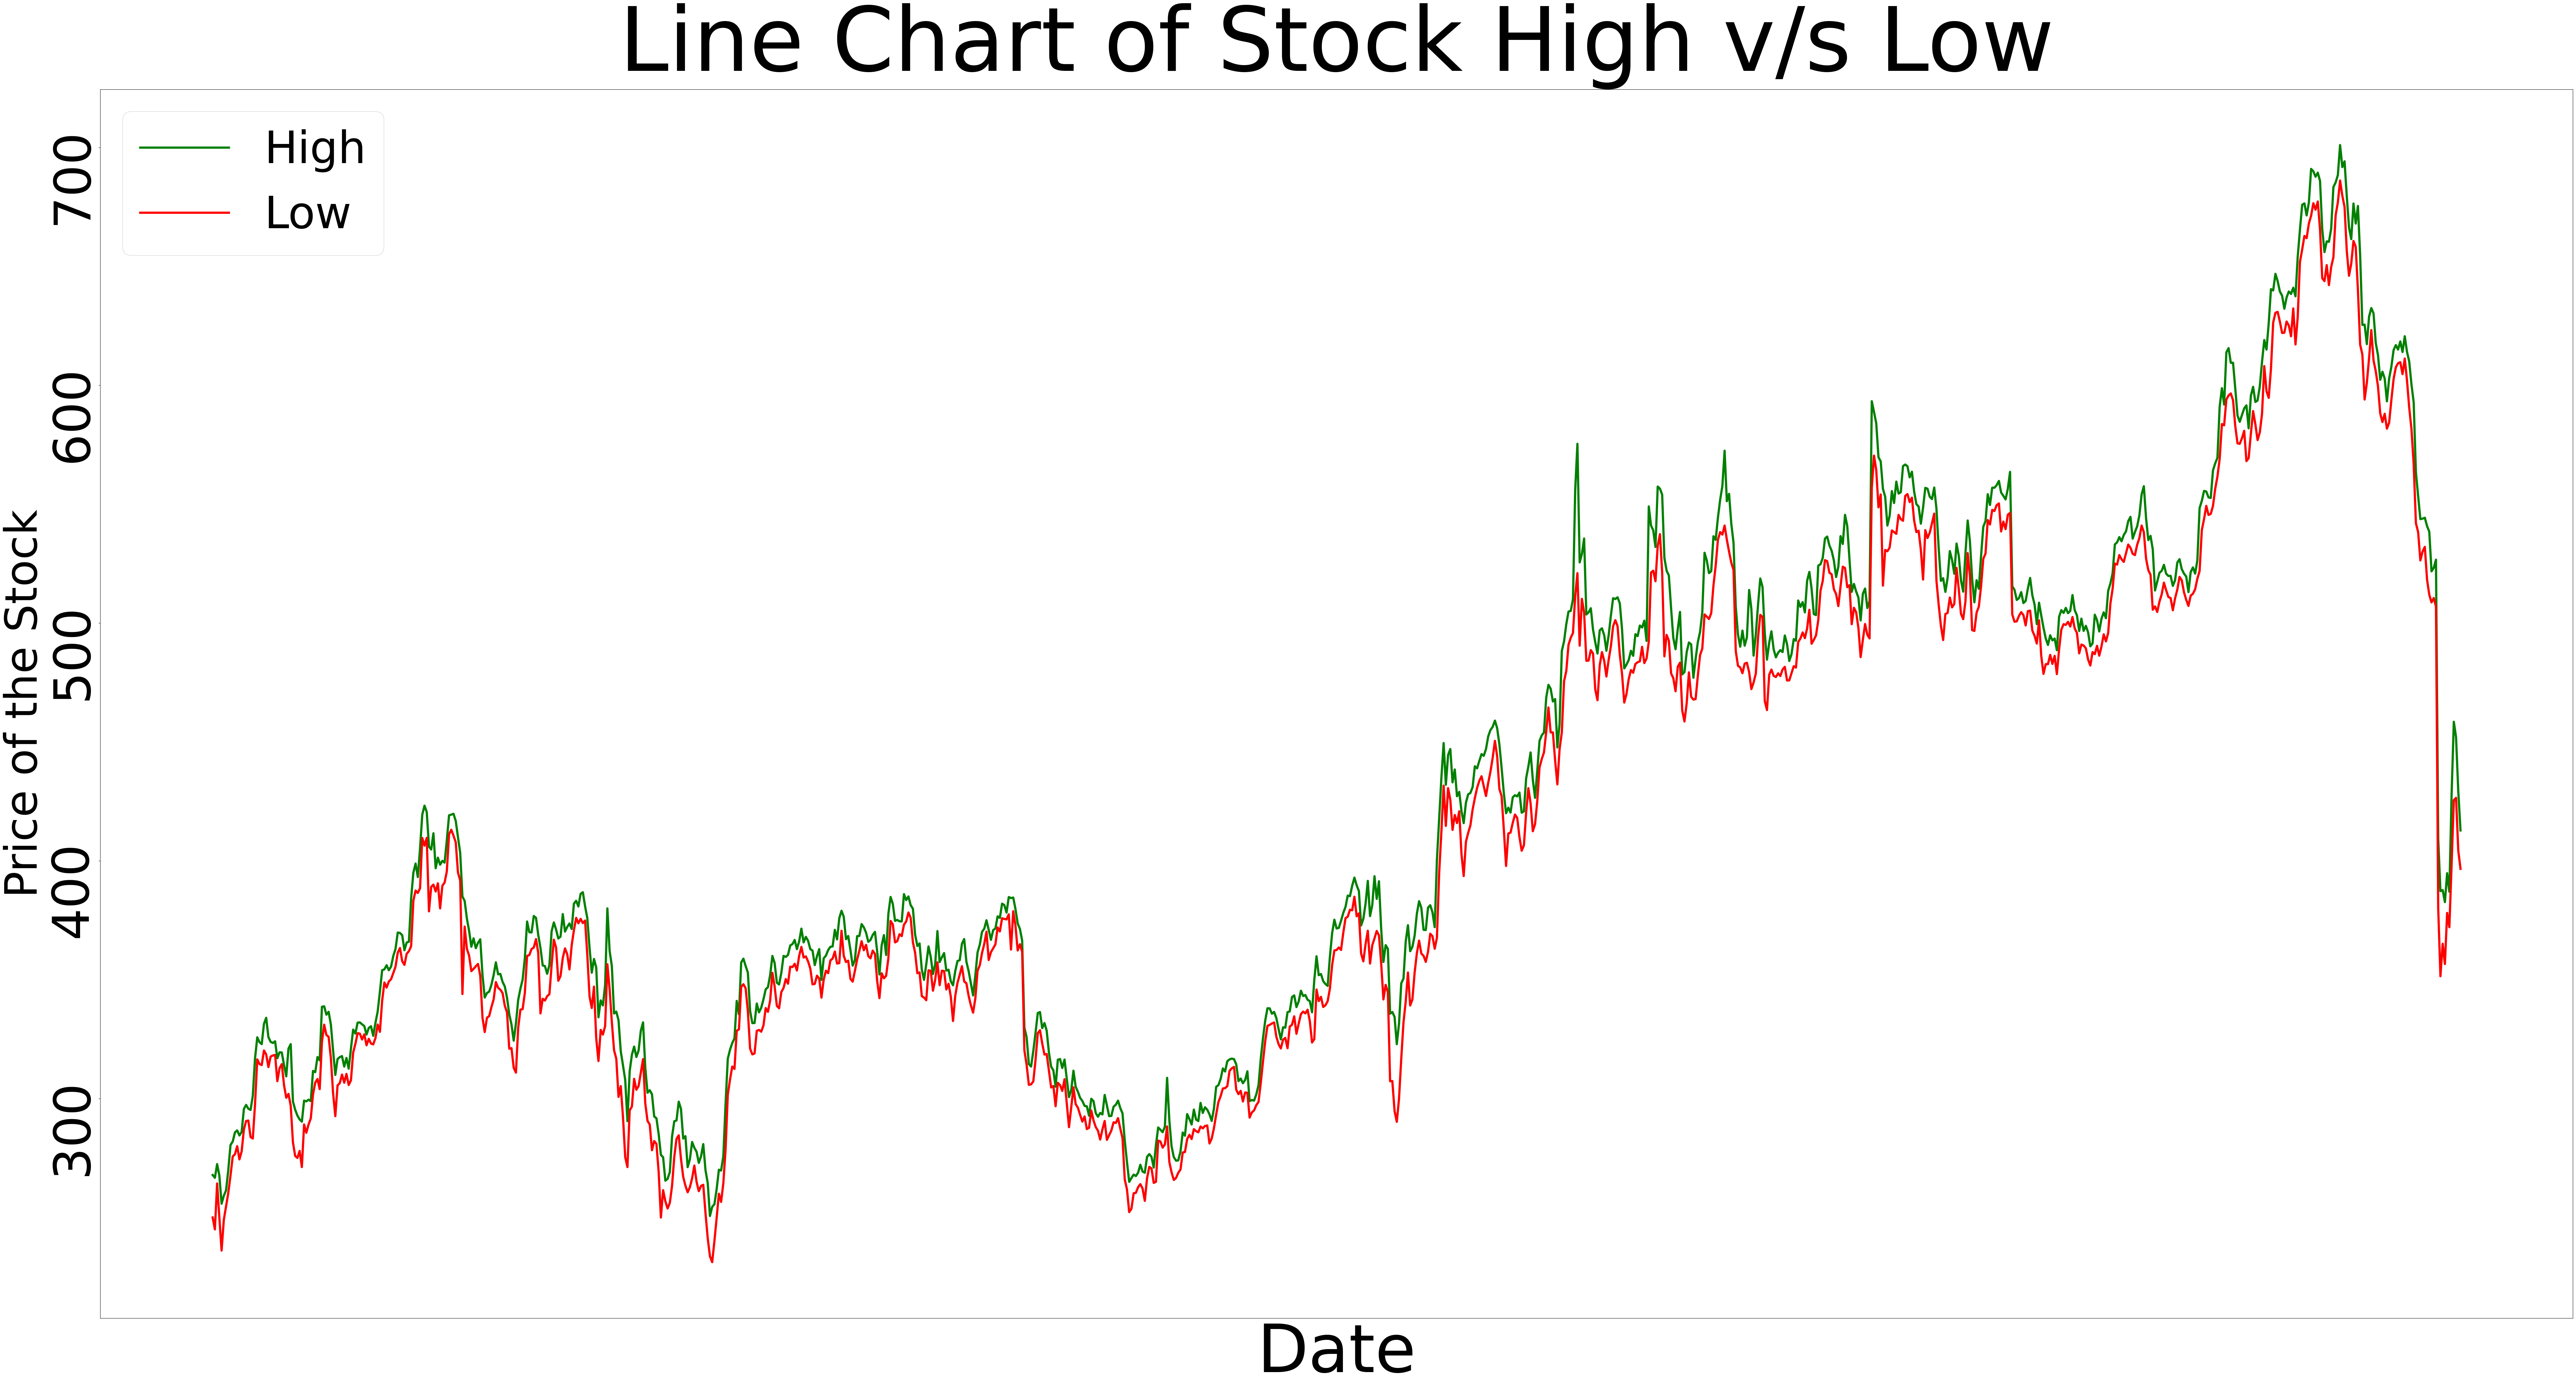

In [11]:
plt.figure(figsize=(100,50))
plt.plot(data['High'],color="green",linewidth='5')
plt.plot(data['Low'],color='red',linewidth='5')
plt.legend(['High','Low'],fontsize=100,loc='upper left')
plt.title('Line Chart of Stock High v/s Low',fontdict={'color':'Black','size':200})
plt.ylabel('Price of the Stock',fontdict={'color':'Black','size':100})
plt.xlabel('Date',fontdict={'color':'Black','size':150})
plt.xticks([])
plt.yticks(fontsize=114, rotation=90)
plt.show()

From the chart, we can see that both high and low price has increased over the year.

### Line chart between Open and Closing Price of the Stock

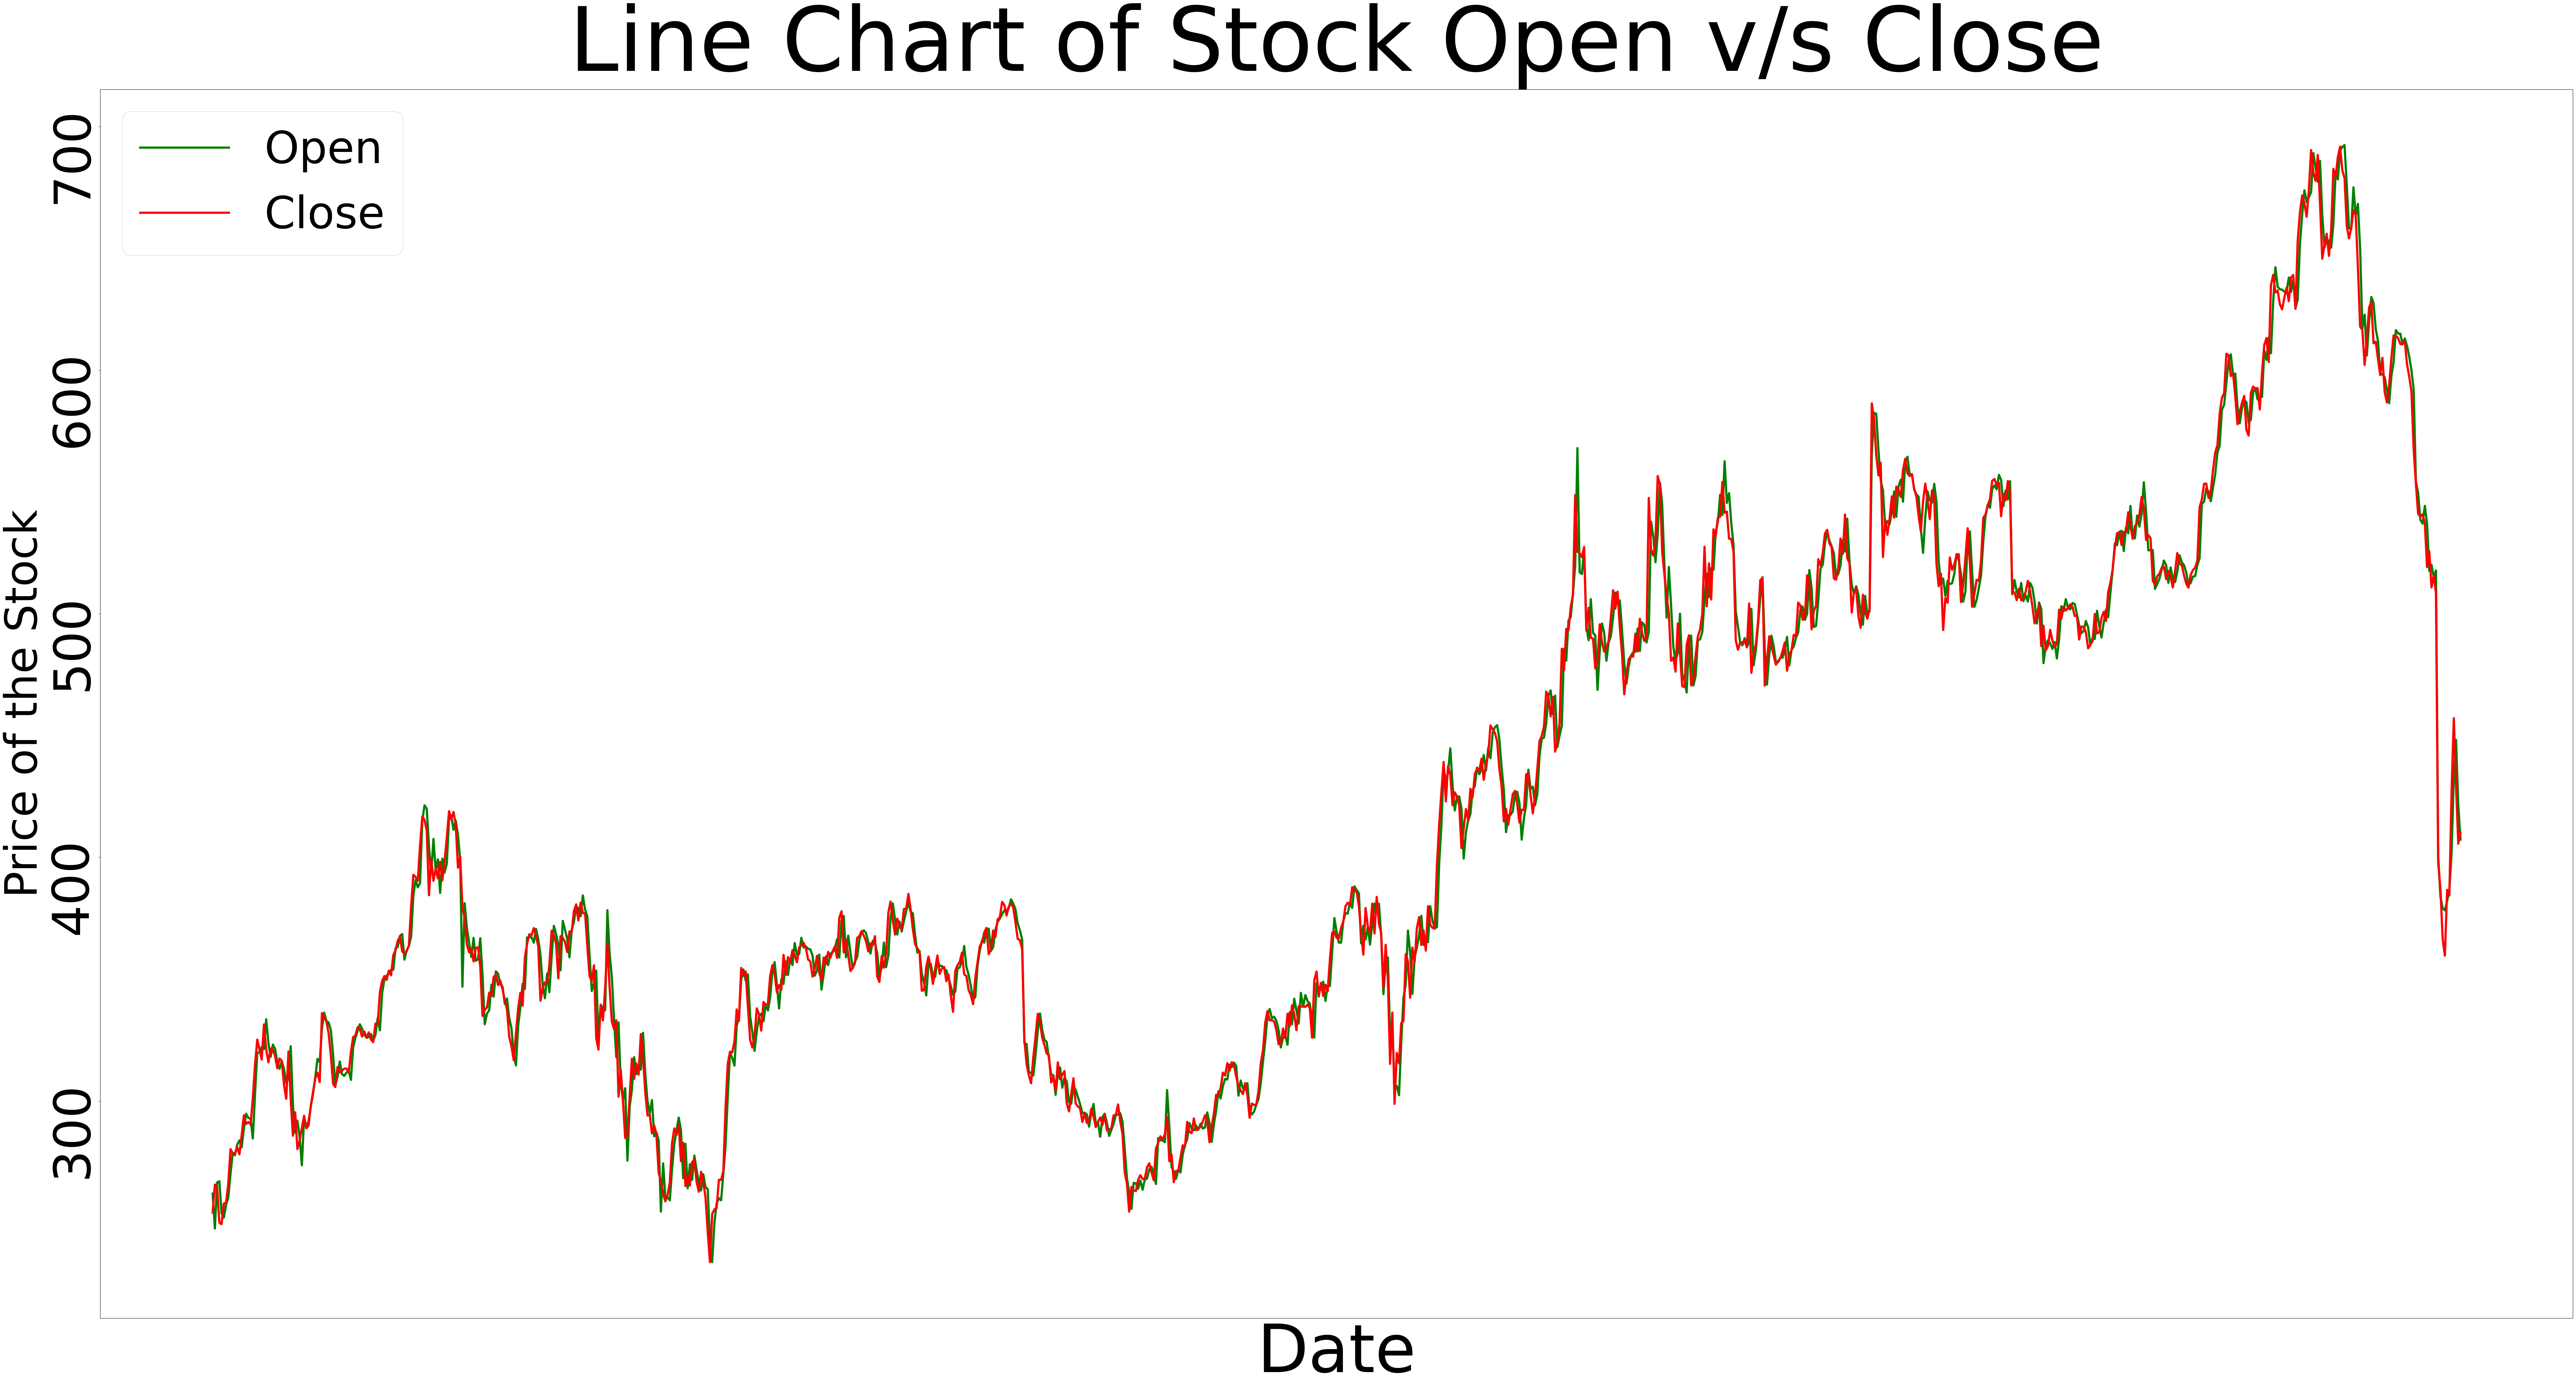

In [12]:
plt.figure(figsize=(100,50))
plt.plot(data['Open'],color="green",linewidth='5')
plt.plot(data['Close'],color='red',linewidth='5')
plt.legend(['Open','Close'],fontsize=100,loc='upper left')
plt.title('Line Chart of Stock Open v/s Close',fontdict={'color':'Black','size':200})
plt.ylabel('Price of the Stock',fontdict={'color':'Black','size':100})
plt.xlabel('Date',fontdict={'color':'Black','size':150})
plt.xticks([])
plt.yticks(fontsize=114, rotation=90)
plt.show()

We can notice that the opening and closing price of the stock is very close, they don't have a huge difference between the price, which means the stock had not Dropped suddenly.

### Line Chart of Volume With Date

In [13]:
plt.figure(figsize=(200,50))
plt.plot(data.index,data["Volume"],color="orange",linewidth=5,alpha=1.0,)
plt.xticks(rotation=90,alpha=1)
plt.title("Volume v/s Date",fontdict={'color':'Black','size':200})
plt.xlabel("Date",fontdict={'color':'Black','size':150})
plt.ylabel("Volume",fontdict={'color':'Black','size':150})
plt.show()

### Line chart of Close Price with Date 

In [14]:
plt.figure(figsize=(200,50))
plt.plot(data.index,data["Adj Close"],color="blue",linewidth=10,alpha=1.0,)
plt.title("Adj Close v/s Date",fontdict={'color':'Black','size':200})
plt.xticks(rotation=90,alpha=1)
plt.xlabel("Date",fontdict={'color':'Black','size':150})
plt.ylabel("Adj Close",fontdict={'color':'Black','size':150})
plt.show()

### From the above charts, we can observe that Day by day the price has increased. We can also see that the volume decrease when the stock price grows, and volumes increase when the stock price start decreasing.

### Checking the Recent trend of the Stock

In [15]:
recent_data=data.iloc[-101:-1,:]
recent_data

Open    High     Low   Close  Adj Close    Volume  \
Date                                                              
2021-09-14  584.89  587.28  575.56  577.76     577.76   3457000   
2021-09-15  578.17  584.62  575.37  582.87     582.87   2755600   
2021-09-16  584.30  587.48  577.72  586.50     586.50   1832000   
2021-09-17  587.85  590.28  580.85  589.35     589.35   4145100   
2021-09-20  586.79  591.53  568.08  575.43     575.43   3732200   
...            ...     ...     ...     ...        ...       ...   
2022-01-28  386.76  387.00  372.08  384.36     384.36  11966600   
2022-01-31  401.97  427.70  398.20  427.14     427.14  20047500   
2022-02-01  432.96  458.48  425.54  457.13     457.13  22542300   
2022-02-02  448.25  451.98  426.48  429.48     429.48  14346000   
2022-02-03  421.44  429.26  404.28  405.60     405.60   9905200   

            Profit_Loss_amount Profit/Loss  
Date                                        
2021-09-14                7.13        Loss  
2021-09-15               -4.70      Profit  
2021-09-16               -2.20      Profit  
2021-09-17               -1.50      Profit  
2021-09-20               11.36        Loss  
...                        ...         ...  
2022-01-28                2.40        Loss  
2022-01-31              -25.17      Profit  
2022-02-01              -24.17      Profit  
2022-02-02               18.77        Loss  
2022-02-03               15.84        Loss  

[100 rows x 8 columns]

### Now we have taken last 100 days data of the stock 

In [16]:
recent_data["Profit/Loss"].value_counts()

Loss      58
Profit    42
Name: Profit/Loss, dtype: int64

In [17]:
recent_data.Profit_Loss_amount.sum()

170.38000000000028

By observing the data I can say that the stock has given a good profit in the last 100 days.

In [18]:
plt.figure(figsize=(150,60))
plt.plot(recent_data.index,recent_data.Profit_Loss_amount,color="blue",linewidth=10)
plt.axhline(y = 0, color = 'r', linestyle = '-',linewidth=5)
plt.title("Profit v/s Loss of last 100 days",fontdict={'color':'Black','size':200})
plt.xticks(rotation=90,fontsize=50)
plt.yticks(fontsize=50)
plt.show()

# <font color="Red">Future Trend Prediction of the Stock 

In [19]:
stock_data=data.copy()
stock_data

Open    High     Low   Close  Adj Close    Volume  \
Date                                                              
2018-02-05  262.00  267.90  250.03  254.26     254.26  11896100   
2018-02-06  247.70  266.70  245.00  265.72     265.72  12595800   
2018-02-07  266.58  272.45  264.33  264.56     264.56   8981500   
2018-02-08  267.08  267.62  250.00  250.10     250.10   9306700   
2018-02-09  253.85  255.80  236.11  249.47     249.47  16906900   
...            ...     ...     ...     ...        ...       ...   
2022-01-31  401.97  427.70  398.20  427.14     427.14  20047500   
2022-02-01  432.96  458.48  425.54  457.13     457.13  22542300   
2022-02-02  448.25  451.98  426.48  429.48     429.48  14346000   
2022-02-03  421.44  429.26  404.28  405.60     405.60   9905200   
2022-02-04  407.31  412.77  396.64  410.17     410.17   7782400   

            Profit_Loss_amount Profit/Loss  
Date                                        
2018-02-05                7.74        Loss  
2018-02-06              -18.02      Profit  
2018-02-07                2.02        Loss  
2018-02-08               16.98        Loss  
2018-02-09                4.38        Loss  
...                        ...         ...  
2022-01-31              -25.17      Profit  
2022-02-01              -24.17      Profit  
2022-02-02               18.77        Loss  
2022-02-03               15.84        Loss  
2022-02-04               -2.86      Profit  

[1009 rows x 8 columns]

In [20]:
y=stock_data["Close"]
y.head()

Date
2018-02-05    254.26
2018-02-06    265.72
2018-02-07    264.56
2018-02-08    250.10
2018-02-09    249.47
Name: Close, dtype: float64

In [21]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Profit_Loss_amount', 'Profit/Loss'],
      dtype='object')

In [22]:
X=stock_data.drop(["Close","Adj Close","Profit_Loss_amount","Profit/Loss","Volume"],axis=1)
X

Open    High     Low
Date                              
2018-02-05  262.00  267.90  250.03
2018-02-06  247.70  266.70  245.00
2018-02-07  266.58  272.45  264.33
2018-02-08  267.08  267.62  250.00
2018-02-09  253.85  255.80  236.11
...            ...     ...     ...
2022-01-31  401.97  427.70  398.20
2022-02-01  432.96  458.48  425.54
2022-02-02  448.25  451.98  426.48
2022-02-03  421.44  429.26  404.28
2022-02-04  407.31  412.77  396.64

[1009 rows x 3 columns]

### Scaling the Values of the dataset

In [23]:
scaled=StandardScaler()

varlist=["Open","High","Low"]
X[varlist]=scaled.fit_transform(X[varlist])
X.head()

Open      High       Low
Date                                    
2018-02-05 -1.447772 -1.441465 -1.510141
2018-02-06 -1.579589 -1.452453 -1.556931
2018-02-07 -1.405553 -1.399802 -1.377121
2018-02-08 -1.400944 -1.444029 -1.510420
2018-02-09 -1.522898 -1.552262 -1.639627

### Creating a function to split the data 

In [24]:
def split(data,steps):
    X=[]
    y=[]
    for i in range(len(data)-steps+1):
        X.append(data[i:i+steps,:-1])
        y.append(data[i+steps-1,-1])
    return np.array(X),np.array(y)  

### Splitting the Data for Train and Validation.

In [36]:
steps=10
X1,y1=split(X.values,steps=steps)
train_split=0.8
splitindex=int(np.ceil(len(X1)*train_split))
date_index=X.index

X_train,X_test=X1[:splitindex],X1[splitindex:]
y_train,y_test=y1[:splitindex],y1[splitindex:]

X_train_date,X_test_date=date_index[:splitindex],date_index[splitindex:-steps]

print(X1.shape,X_train.shape,X_test.shape,y_test.shape)

(1000, 10, 2) (800, 10, 2) (200, 10, 2) (200,)


### Creating the ML Model

In [26]:
model=Sequential()
model.add(LSTM(50,input_shape=(X_train.shape[1],X_train.shape[2]),activation='relu',return_sequences=True))
model.add(LSTM(50,activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10600     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,851
Trainable params: 30,851
Non-trainable params: 0
_________________________________________________________________


2023-07-01 15:45:13.863299: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Fitting the Dataset in the model

In [27]:
model.fit(X_train,y_train,epochs=100,verbose=2)

Epoch 1/100
25/25 - 1s - loss: 0.3073 - 677ms/epoch - 27ms/step
Epoch 2/100
25/25 - 0s - loss: 0.0390 - 85ms/epoch - 3ms/step
Epoch 3/100
25/25 - 0s - loss: 0.0264 - 85ms/epoch - 3ms/step
Epoch 4/100
25/25 - 0s - loss: 0.0217 - 85ms/epoch - 3ms/step
Epoch 5/100
25/25 - 0s - loss: 0.0191 - 83ms/epoch - 3ms/step
Epoch 6/100
25/25 - 0s - loss: 0.0163 - 83ms/epoch - 3ms/step
Epoch 7/100
25/25 - 0s - loss: 0.0141 - 82ms/epoch - 3ms/step
Epoch 8/100
25/25 - 0s - loss: 0.0121 - 84ms/epoch - 3ms/step
Epoch 9/100
25/25 - 0s - loss: 0.0101 - 82ms/epoch - 3ms/step
Epoch 10/100
25/25 - 0s - loss: 0.0088 - 84ms/epoch - 3ms/step
Epoch 11/100
25/25 - 0s - loss: 0.0089 - 83ms/epoch - 3ms/step
Epoch 12/100
25/25 - 0s - loss: 0.0081 - 83ms/epoch - 3ms/step
Epoch 13/100
25/25 - 0s - loss: 0.0071 - 83ms/epoch - 3ms/step
Epoch 14/100
25/25 - 0s - loss: 0.0072 - 82ms/epoch - 3ms/step
Epoch 15/100
25/25 - 0s - loss: 0.0054 - 83ms/epoch - 3ms/step
Epoch 16/100
25/25 - 0s - loss: 0.0071 - 84ms/epoch - 3ms/step

### Predicted value given by the model

In [28]:
y_pred=model.predict(X_test)
y_pred

7/7 [==============================] - 0s 2ms/step


array([[ 0.8161815 ],
       [ 0.8155187 ],
       [ 0.855112  ],
       [ 0.7951242 ],
       [ 0.8200699 ],
       [ 0.83407456],
       [ 0.8832265 ],
       [ 0.83676964],
       [ 0.79580224],
       [ 0.7181536 ],
       [ 0.7971861 ],
       [ 0.76077807],
       [ 0.6409781 ],
       [ 0.6486178 ],
       [ 0.6446571 ],
       [ 0.6587011 ],
       [ 0.63834447],
       [ 0.6519    ],
       [ 0.6011731 ],
       [ 0.6955698 ],
       [ 0.75633407],
       [ 0.72632223],
       [ 0.7826047 ],
       [ 0.76333237],
       [ 0.76716727],
       [ 0.80587775],
       [ 0.77779824],
       [ 0.7519456 ],
       [ 0.6932855 ],
       [ 0.7152682 ],
       [ 0.69250387],
       [ 0.71823215],
       [ 0.69571   ],
       [ 0.63769525],
       [ 0.6568189 ],
       [ 0.70848364],
       [ 0.7416259 ],
       [ 0.6985163 ],
       [ 0.70466936],
       [ 0.7376377 ],
       [ 0.74792194],
       [ 0.7871543 ],
       [ 0.83668077],
       [ 0.8942463 ],
       [ 0.9796614 ],
       [ 1

In [29]:
rmse=mean_squared_error(y_test,y_pred,squared=False)
mape=mean_absolute_percentage_error(y_test,y_pred)

print("Root Mean Squar Error:" ,rmse)
print("Mean Absolute Percentage Error: ",mape)

Root Mean Squar Error: 0.07290834014021251
Mean Absolute Percentage Error:  0.062028765815130324


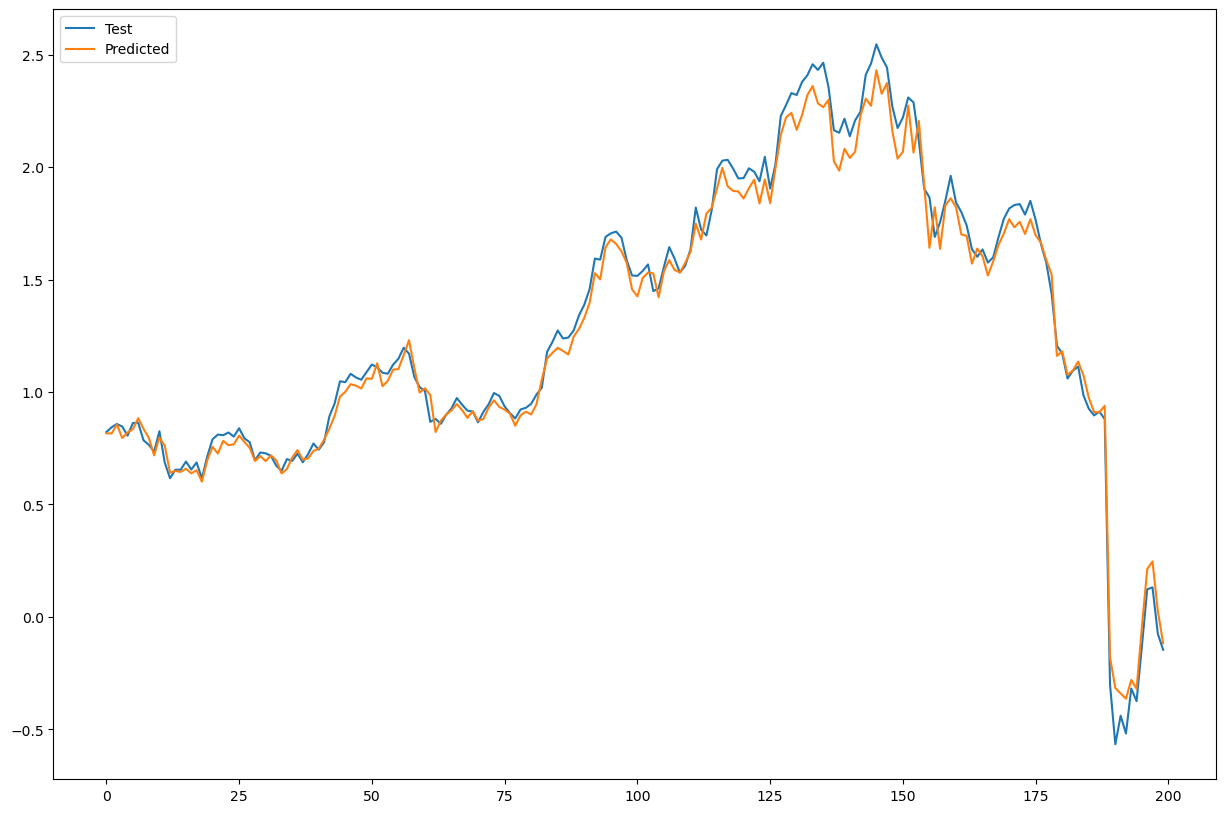

In [30]:
plt.figure(figsize=(15,10))
plt.plot(y_test,label="Test Data")
plt.plot(y_pred,label="Predicted Data")
plt.legend(['Test','Predicted'],fontsize=10,loc='upper left')
plt.show()

In [31]:
r2_score(y_test,y_pred)

0.9876739502536095

## The Accuracy Score of the Model is 98.76%

### By using this model we can predict 98.76% correct future value of the stock 